#### Question 3 (3 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as logreg
from random import sample
plt.style.use('fivethirtyeight')
%matplotlib inline

In [56]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

x, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [57]:
# Your code goes here
clf = logreg(random_state = 0, solver='lbfgs').fit(xtrain,ytrain)
ylogprob = clf.predict(xtest)
fpr, tpr, thresholds = metrics.roc_curve(ytest, ylogprob)

auc = metrics.auc(fpr,tpr)
print("The AUC of my prediction is", round(auc,4))

The AUC of my prediction is 0.7688


b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

In [58]:
# Your code goes here
# This function takes in a dataset & returns a subset of "n" elements.

def sample_func(dataset, n):
    list_dataset = list(dataset)
    subset = sample(list_dataset, n)
    return subset

In [59]:
def auc(xtrain, ytrain, xtest, ytest, sample_points):
    auc_list = []
    
    # Loop to sample & calculate the AUC 1000 times for each sample size.
    for i in range(1000):
        xtrain_subset = sample_func(xtrain, sample_points)
        ytrain_subset = sample_func(ytrain, sample_points)
        
        clf = logreg(random_state = 0, solver = 'lbfgs').fit(xtrain_subset, ytrain_subset)
        ylogprob = clf.predict(xtest)
        fpr,tpr,thresholds = metrics.roc_curve(ytest, ylogprob)
        auc = metrics.auc(fpr,tpr)
        auc_list.append(auc)
        
    return auc_list

auc100 = auc(xtrain, ytrain, xtest, ytest, 100)
auc300 = auc(xtrain, ytrain, xtest, ytest, 300)
auc1000 = auc(xtrain, ytrain, xtest, ytest, 1000)

Text(0, 0.5, 'Frequency')

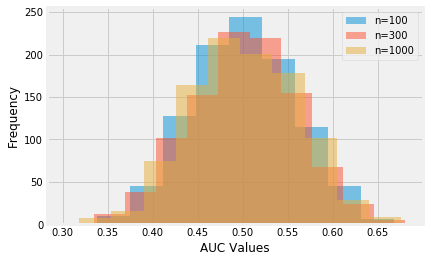

In [63]:
plt.hist(auc100, alpha=0.5, label= 'n=100')
plt.hist(auc300, alpha=0.5, label='n=300')
plt.hist(auc1000, alpha=0.5, label= 'n=1000')

plt.legend(loc = 'upper right')
plt.xlabel("AUC Values")
plt.ylabel("Frequency")

In [61]:
# The histogram has a normal distribution curve (bell-shaped)